In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier


In [2]:
dataset = pd.read_csv('seismic-bumps.csv')

In [3]:
dataset.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.isnull().any()

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
ghazard           False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

In [5]:
dataset.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.578000e+03,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.0,2578.0,2578.0,2578.000000,2578.000000,2578.000000
mean,9.034118e+04,539.366563,12.392940,4.521334,0.861521,0.394492,0.393716,0.067882,0.004655,0.0,0.0,0.0,4986.850272,4288.809154,0.065943
std,2.294339e+05,562.945864,80.352799,63.211324,1.365573,0.784454,0.770372,0.279364,0.068080,0.0,0.0,0.0,20473.216356,19378.874276,0.248230
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.169250e+04,191.250000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.550000e+04,379.500000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.275750e+04,669.000000,38.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2675.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [6]:
print(dataset.groupby('class').size())

class
0    2408
1     170
dtype: int64


In [7]:
print(dataset.groupby('energy').size())

energy
0         1458
50           1
100         14
200         37
250          1
          ... 
207900       1
208000       1
300000       2
303000       1
402000       1
Length: 242, dtype: int64


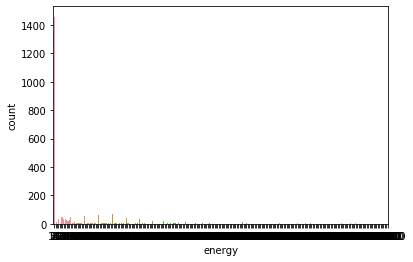

In [8]:
import seaborn as sns
sns.countplot(dataset['energy'],label="Count")
plt.show()

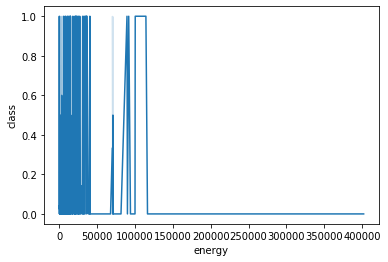

In [9]:
import seaborn as sns
sns.lineplot(x='energy',y='class',data=dataset)
plt.show()

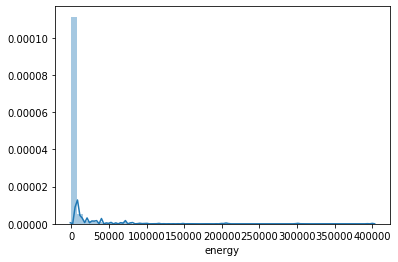

In [10]:
sns.distplot(dataset['energy'])

In [11]:
dataset.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


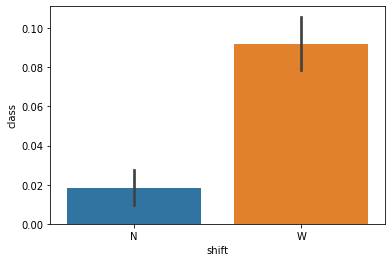

In [12]:
sns.barplot(x='shift',y='class',data=dataset)

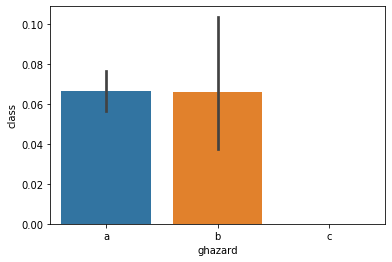

In [13]:
sns.barplot(x='ghazard',y='class',data=dataset)

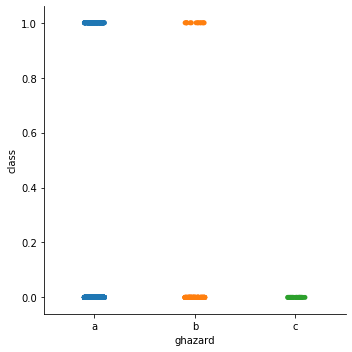

In [23]:
sns.catplot(x='ghazard',y ='class',data=dataset)

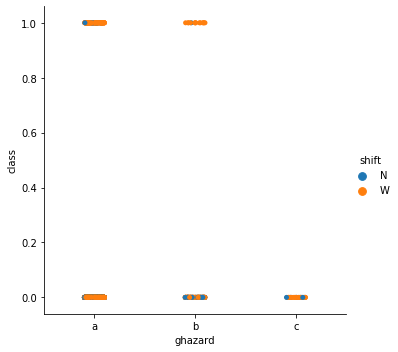

In [43]:
sns.catplot(x='ghazard',y ='class',data=dataset,hue='shift')

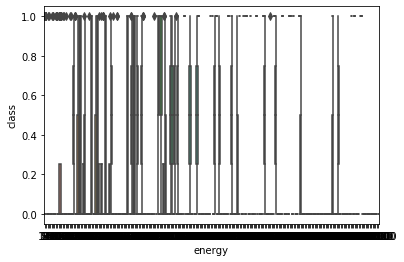

In [37]:
sns.boxplot(x='energy',y='class',data=dataset)


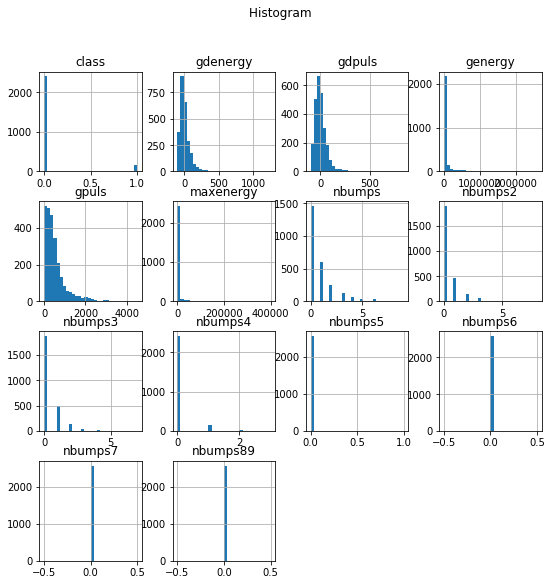

In [25]:
import pylab as pl
dataset.drop('energy' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram ")
plt.savefig('energy')
plt.show()

In [26]:
X = dataset.iloc[:,8:-1].values
y = dataset['class']


In [27]:
X.shape

(2578, 10)

In [28]:
y.shape

(2578,)

In [29]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [31]:
print(X_train)  
print(y_train)

[[   0    0    0 ...    0    0    0]
 [   1    0    1 ...    0 4000 4000]
 [   1    0    1 ...    0 4000 4000]
 ...
 [   2    1    1 ...    0 2600 2000]
 [   1    0    1 ...    0 1000 1000]
 [   0    0    0 ...    0    0    0]]
17      0
58      0
842     0
411     1
2438    0
       ..
1033    0
1731    1
763     0
835     0
1653    0
Name: class, Length: 2062, dtype: int64


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.93


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.91


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.93
